In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

import warnings
warnings.filterwarnings("ignore")

## Run `make_anomalies_tables.ipynb` first to create `../data/*_expert_anomalies.csv`

In [2]:
# M31
m31_oid = np.memmap('../data/oid_m31.dat', mode='r', dtype=np.uint64)
m31_names = open('../data/feature_m31.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
m31_dtype = [(name, np.float32) for name in m31_names]
m31_x = np.memmap('../data/feature_m31.dat', mode='r', dtype=m31_dtype, shape=m31_oid.shape)


# Disk
disk_oid = np.memmap('../data/oid_disk.dat', mode='r', dtype=np.uint64)
disk_names = open('../data/feature_disk.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
disk_dtype = [(name, np.float32) for name in disk_names]
disk_x = np.memmap('../data/feature_disk.dat', mode='r', dtype=disk_dtype, shape=disk_oid.shape)


# Deep
deep_oid = np.memmap('../data/oid_deep.dat', mode='r', dtype=np.uint64)
deep_names = open('../data/feature_deep.name').read().split()
#x = np.memmap('feature_m31.dat', mode='r', dtype=np.float32, shape=(oid.size, len(names)))
# OR
deep_dtype = [(name, np.float32) for name in deep_names]
deep_x = np.memmap('../data/feature_deep.dat', mode='r', dtype=deep_dtype, shape=deep_oid.shape)

In [3]:
# updated 08/03/20

m31_anom_tab = pd.read_csv('../data/m31_expert_anomalies.csv', index_col='oid')
disk_anom_tab = pd.read_csv('../data/disk_expert_anomalies.csv', index_col='oid')
deep_anom_tab = pd.read_csv('../data/deep_expert_anomalies.csv', index_col='oid')

In [4]:
deep_anom_tab

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
oid,,,,,,,,,,,,,,,,,,,,,
795209200003484,1.065499,0.365559,0.003021,0.428526,0.125921,2.214380e+08,0.922501,1.499201,-1.003169,0.001179,...,0.084419,0.020811,0.716804,2.286829,114.648650,30.195904,-0.551200,0.547797,0.914251,19.683895
795212100007964,1.111501,0.443548,0.000000,0.451684,0.145140,2.692333e+08,1.435499,1.881100,-1.460792,0.016879,...,0.141460,0.020412,0.702471,2.053576,55.431747,25.379475,-0.335953,0.720168,0.930250,19.899580
795205100007271,0.955001,0.420408,0.000000,0.435356,0.137443,4.468932e+08,0.925751,1.362000,-1.262783,0.004858,...,0.107716,0.023048,0.688661,2.908178,102.234750,15.006779,-0.114594,0.524128,0.906123,20.061310
795202100005941,1.225000,0.360000,0.040000,0.401279,0.232147,2.107766e+08,0.911499,1.674002,-0.613298,0.016108,...,0.173109,0.027722,0.873601,1.574267,37.050762,18.806757,-0.413568,0.611490,0.832265,20.334421
795204300041568,0.429500,0.347181,0.002967,0.155771,1.482617,8.803505e+09,0.504499,0.566999,-1.781655,0.000813,...,0.156993,0.025687,0.776304,0.882549,10.700652,384.903700,-0.257525,0.256391,0.972192,15.996257
795205200006323,2.071999,0.084337,0.006024,0.115439,1.835477,4.105364e+08,0.301001,0.560999,68.061030,0.023315,...,0.208520,0.049811,0.879319,0.767227,4.609248,159.122310,-6.714146,0.354695,0.715763,19.397844
795214300016648,1.579500,0.030303,0.008264,0.095613,0.984097,1.424198e+09,0.102999,0.202999,124.642740,-0.008335,...,0.179766,0.056682,0.781076,0.641176,4.981922,168.364620,-10.254572,0.219661,0.437775,19.152811
795202200022472,0.173500,0.386139,0.017327,0.085308,1.439886,8.409698e+09,0.127000,0.165100,-0.484336,0.000025,...,0.182860,0.019498,0.787044,0.932699,10.394759,33.165110,0.095718,0.068790,0.824116,16.013647
795203300003762,0.146000,0.416244,0.020305,0.095520,1.812743,1.111668e+10,0.109999,0.154999,-0.755226,0.000149,...,0.177820,0.023329,0.726019,0.816589,11.468212,22.027680,-0.488773,0.061073,0.856925,16.316570


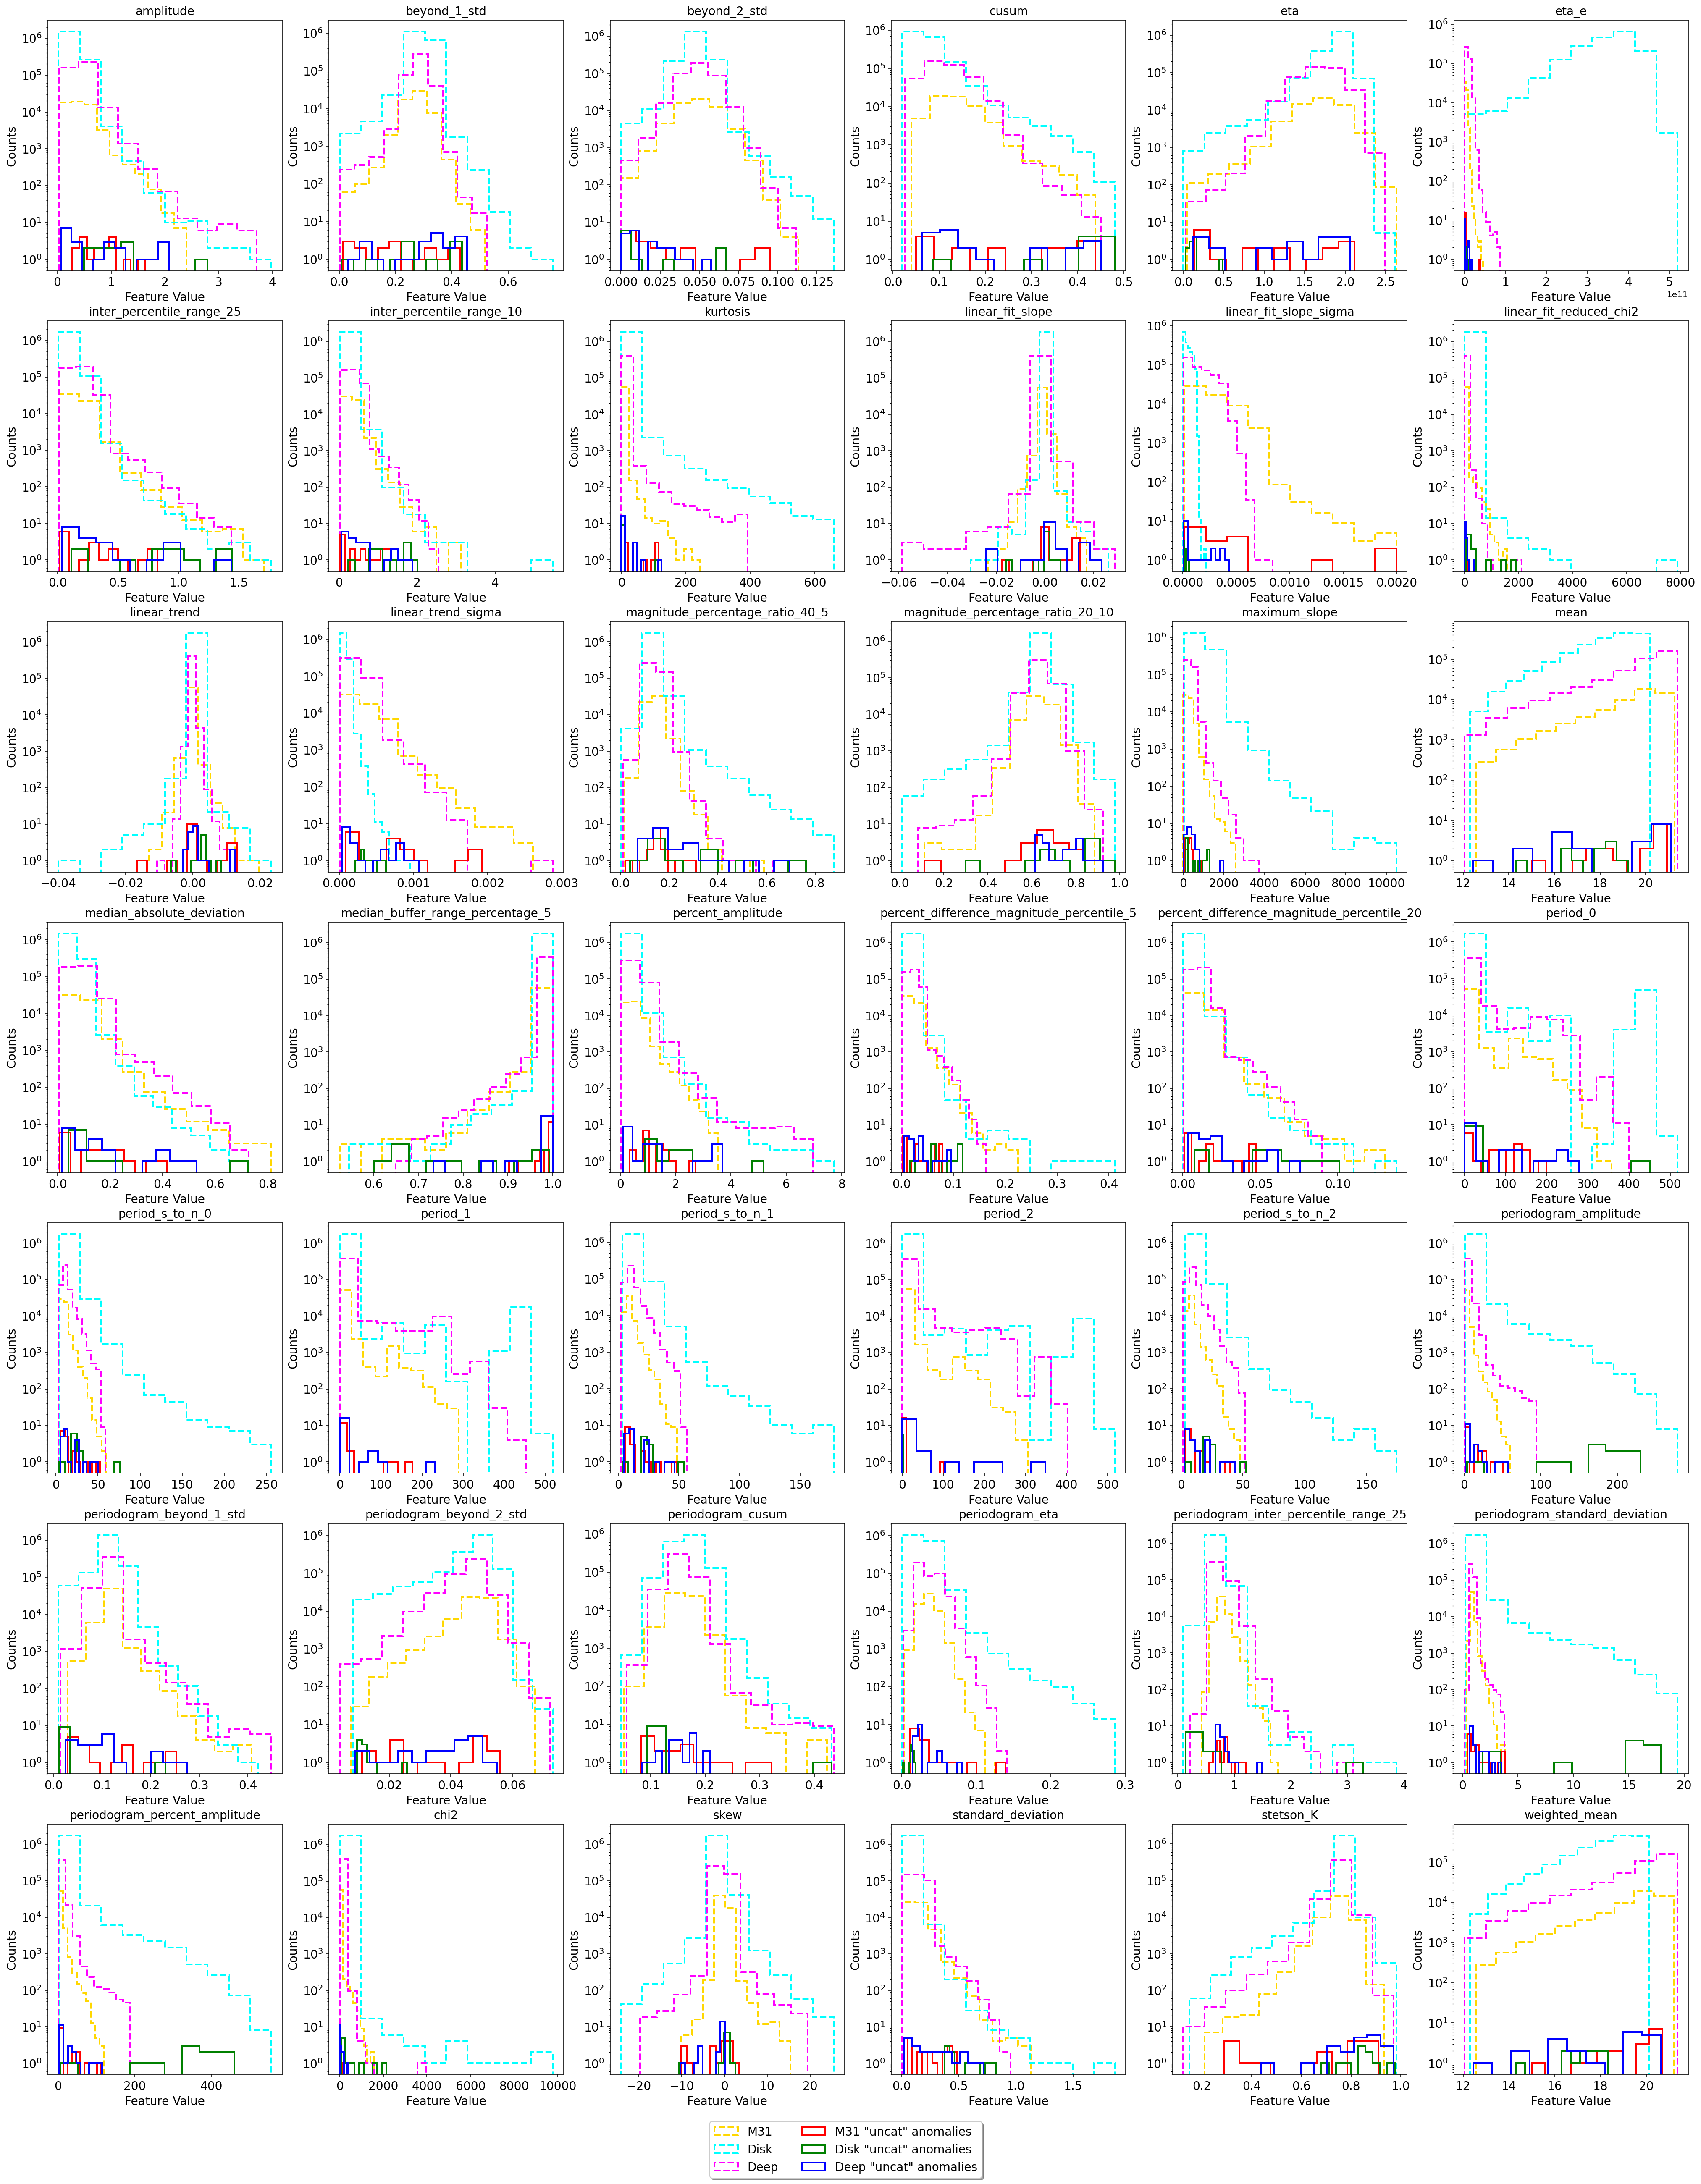

In [5]:
fig = plt.figure(figsize=(35, 45))

for i, f in enumerate(m31_names):
    ax = fig.add_subplot(7, 6, i+1) #42 features

    plt.hist(m31_x['{}'.format(f)], histtype='step', color='gold', 
             linestyle='dashed', linewidth=2, label='M31')
    plt.hist(disk_x['{}'.format(f)], histtype='step', color='cyan', 
             linestyle='dashed', linewidth=2, label='Disk')
    plt.hist(deep_x['{}'.format(f)], histtype='step', color='magenta', 
             linestyle='dashed', linewidth=2, label='Deep')
    plt.hist(m31_anom_tab['{}'.format(f)], histtype='step', color='red', 
             alpha=1, linewidth=2, label='M31 "uncat" anomalies')
    plt.hist(disk_anom_tab['{}'.format(f)], histtype='step', color='green', 
             alpha=1, linewidth=2, label='Disk "uncat" anomalies')
    plt.hist(deep_anom_tab['{}'.format(f)], histtype='step', color='blue', 
             alpha=1, linewidth=2, label='Deep "uncat" anomalies')
    
    ax.set_title(r'{}'.format(f), fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel('Feature Value', fontsize=14)
    ax.set_yscale('log')
    ax.tick_params(labelsize=14)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(-3.2, -0.3), ncol=2, fancybox=True, shadow=True, fontsize=14)

fig.tight_layout()
fig.savefig('../figs/histograms/all_features_histogram_uncat_anomalies.png', format='png', bbox_inches='tight', dpi=300)

# PLOT 3 MOST IMPORTANT FEATURES (MOST IMPORTANT FROM 1st THREE PRINCIPAL COMPONENT)

In [6]:
three_most_important_features = ['standard_deviation', 'periodogram_amplitude', 'chi2']

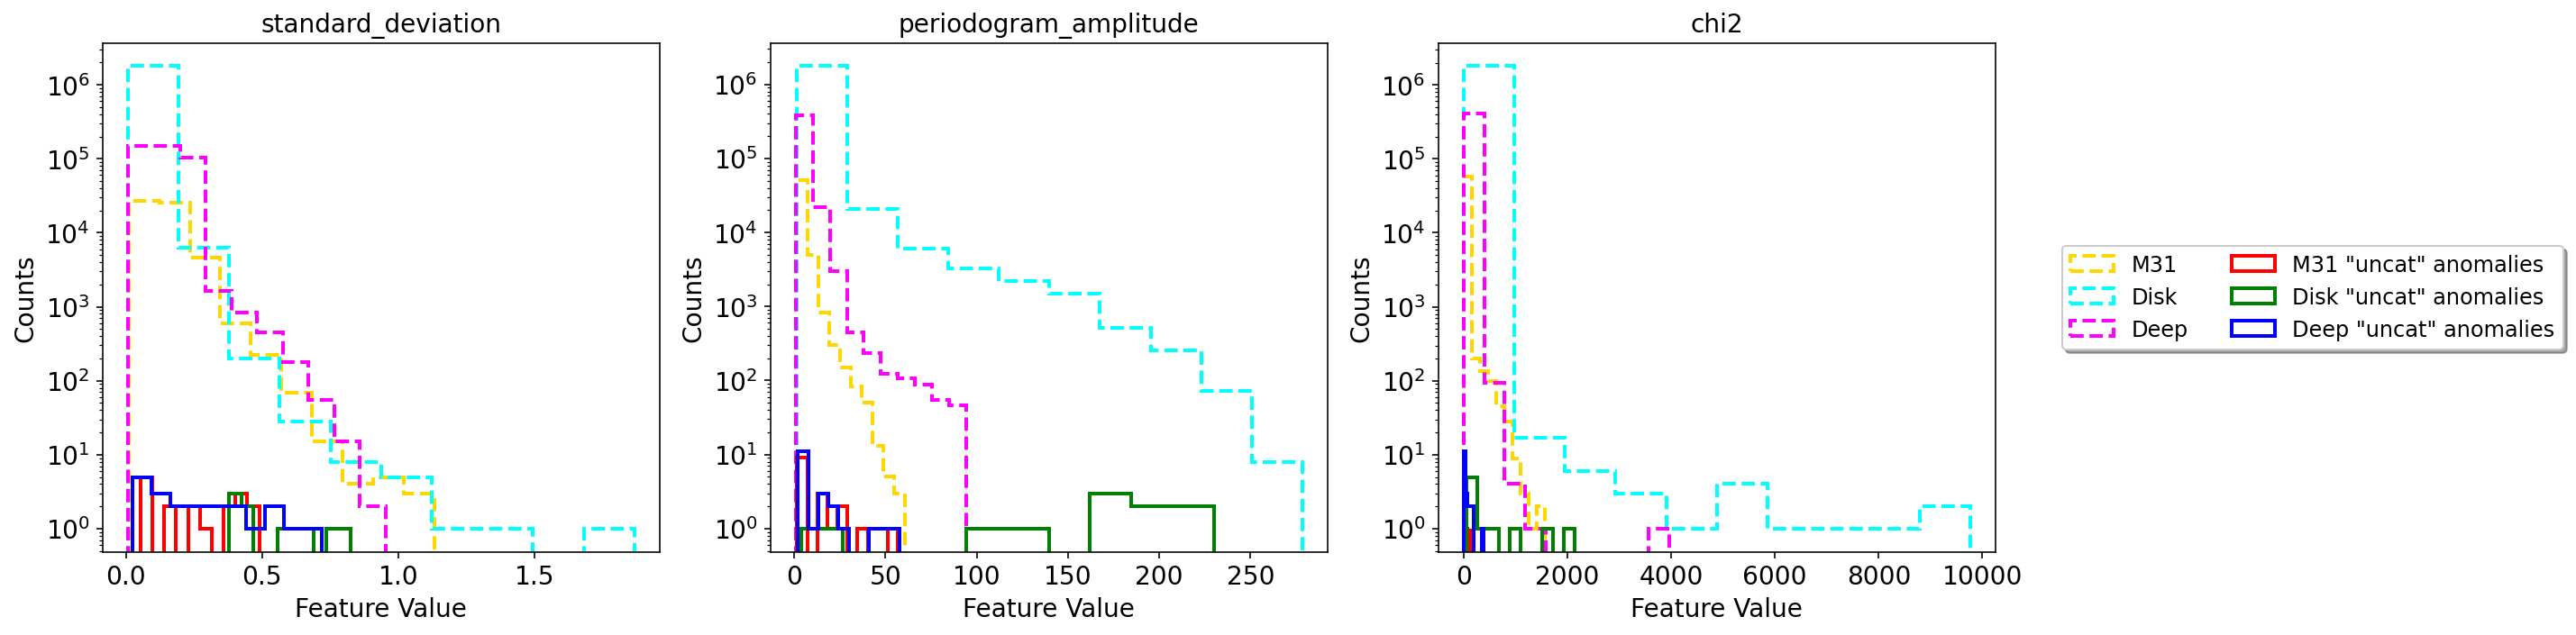

In [7]:
fig = plt.figure(figsize=(20, 5))

for i, f in enumerate(three_most_important_features):
    ax = fig.add_subplot(1, 3, i+1) #3 features

    plt.hist(m31_x['{}'.format(f)], histtype='step', color='gold', 
             linestyle='dashed', linewidth=2, label='M31')
    plt.hist(disk_x['{}'.format(f)], histtype='step', color='cyan', 
             linestyle='dashed', linewidth=2, label='Disk')
    plt.hist(deep_x['{}'.format(f)], histtype='step', color='magenta', 
             linestyle='dashed', linewidth=2, label='Deep')
    plt.hist(m31_anom_tab['{}'.format(f)], histtype='step', color='red', 
             alpha=1, linewidth=2, label='M31 "uncat" anomalies')
    plt.hist(disk_anom_tab['{}'.format(f)], histtype='step', color='green', 
             alpha=1, linewidth=2, label='Disk "uncat" anomalies')
    plt.hist(deep_anom_tab['{}'.format(f)], histtype='step', color='blue', 
             alpha=1, linewidth=2, label='Deep "uncat" anomalies')
    
    ax.set_title(r'{}'.format(f), fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel('Feature Value', fontsize=14)
    ax.set_yscale('log')
    ax.tick_params(labelsize=14)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=2, fancybox=True, shadow=True, fontsize=12)

fig.tight_layout()
fig.savefig('../figs/histograms/three_most_important_features_uncat_anomalies.png', format='png', bbox_inches='tight', dpi=300)

# Plot artefacts and interesting objects of outliers lists only

In [8]:
m31_maria_list = pd.read_csv('../data/m31_maria.csv')
m31_maria_list= m31_maria_list.set_index('oid')

disk_maria_list = pd.read_csv('../data/disk_maria.csv')
disk_maria_list= disk_maria_list.set_index('oid')

deep_maria_list = pd.read_csv('../data/deep_maria.csv')
deep_maria_list= deep_maria_list.set_index('oid')

## Below are outliers tables (incl. artefacts), not expert anomalies (no incl. artefacts)!

m31_outlier_tab = pd.read_csv('../data/m31_outliers_table.csv', index_col='oid')
disk_outlier_tab = pd.read_csv('../data/disk_outliers_table.csv', index_col='oid')
deep_outlier_tab = pd.read_csv('../data/deep_outliers_table.csv', index_col='oid')

In [9]:
m31_full_tab = pd.concat([m31_outlier_tab, m31_maria_list], axis=1)
disk_full_tab = pd.concat([disk_outlier_tab, disk_maria_list], axis=1)
deep_full_tab = pd.concat([deep_outlier_tab, deep_maria_list], axis=1)

m31_full_tab.head()

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,chi2,skew,standard_deviation,stetson_K,weighted_mean,#,tag,tag_detailed,Comments,Unnamed: 5
oid,,,,,,,,,,,,,,,,,,,,,
695211400034403,2.3800,0.293706,0.048951,0.210137,1.039928,1.205708e+09,1.702999,2.813601,-0.436671,-0.000443,...,1568.272300,0.410859,1.097088,0.875042,16.457632,0,artefact,bright star,NaN,NaN
695211400124577,2.0445,0.358025,0.006173,0.203197,1.588497,2.624290e+09,1.459000,3.120001,-0.784893,-0.003234,...,1209.481200,0.397880,1.082259,0.903058,16.626255,1,artefact,bright star,NaN,NaN
695211400102351,2.3620,0.396694,0.024793,0.155299,1.549895,2.136628e+09,1.404751,3.065599,-0.579718,0.001458,...,747.957150,0.321721,1.132575,0.900564,17.092886,2,artefact,bright star,NaN,NaN
695211400053697,2.2125,0.310000,0.080000,0.229030,1.349776,4.898475e+08,1.032000,2.337502,0.153038,0.000263,...,1371.101700,0.280188,0.917519,0.851317,16.688284,3,artefact,bright star,NaN,NaN
695211200075348,1.1080,0.458333,0.013889,0.400897,0.117357,2.367448e+07,1.024000,1.484999,-1.029066,0.017021,...,12.322401,0.163349,0.557800,0.902715,20.001472,4,Var,NaN,MASTER OT J004126.22+414350.0 (ATel #9470). Th...,NaN


In [10]:
m31_artefacts = m31_full_tab[m31_full_tab.tag == 'artefact']
m31_interesting = m31_full_tab[m31_full_tab.tag != 'artefact']

disk_artefacts = disk_full_tab[disk_full_tab.tag == 'artefact']
disk_interesting = disk_full_tab[disk_full_tab.tag != 'artefact']

deep_artefacts = deep_full_tab[deep_full_tab.tag == 'artefact']
deep_interesting = deep_full_tab[deep_full_tab.tag != 'artefact']

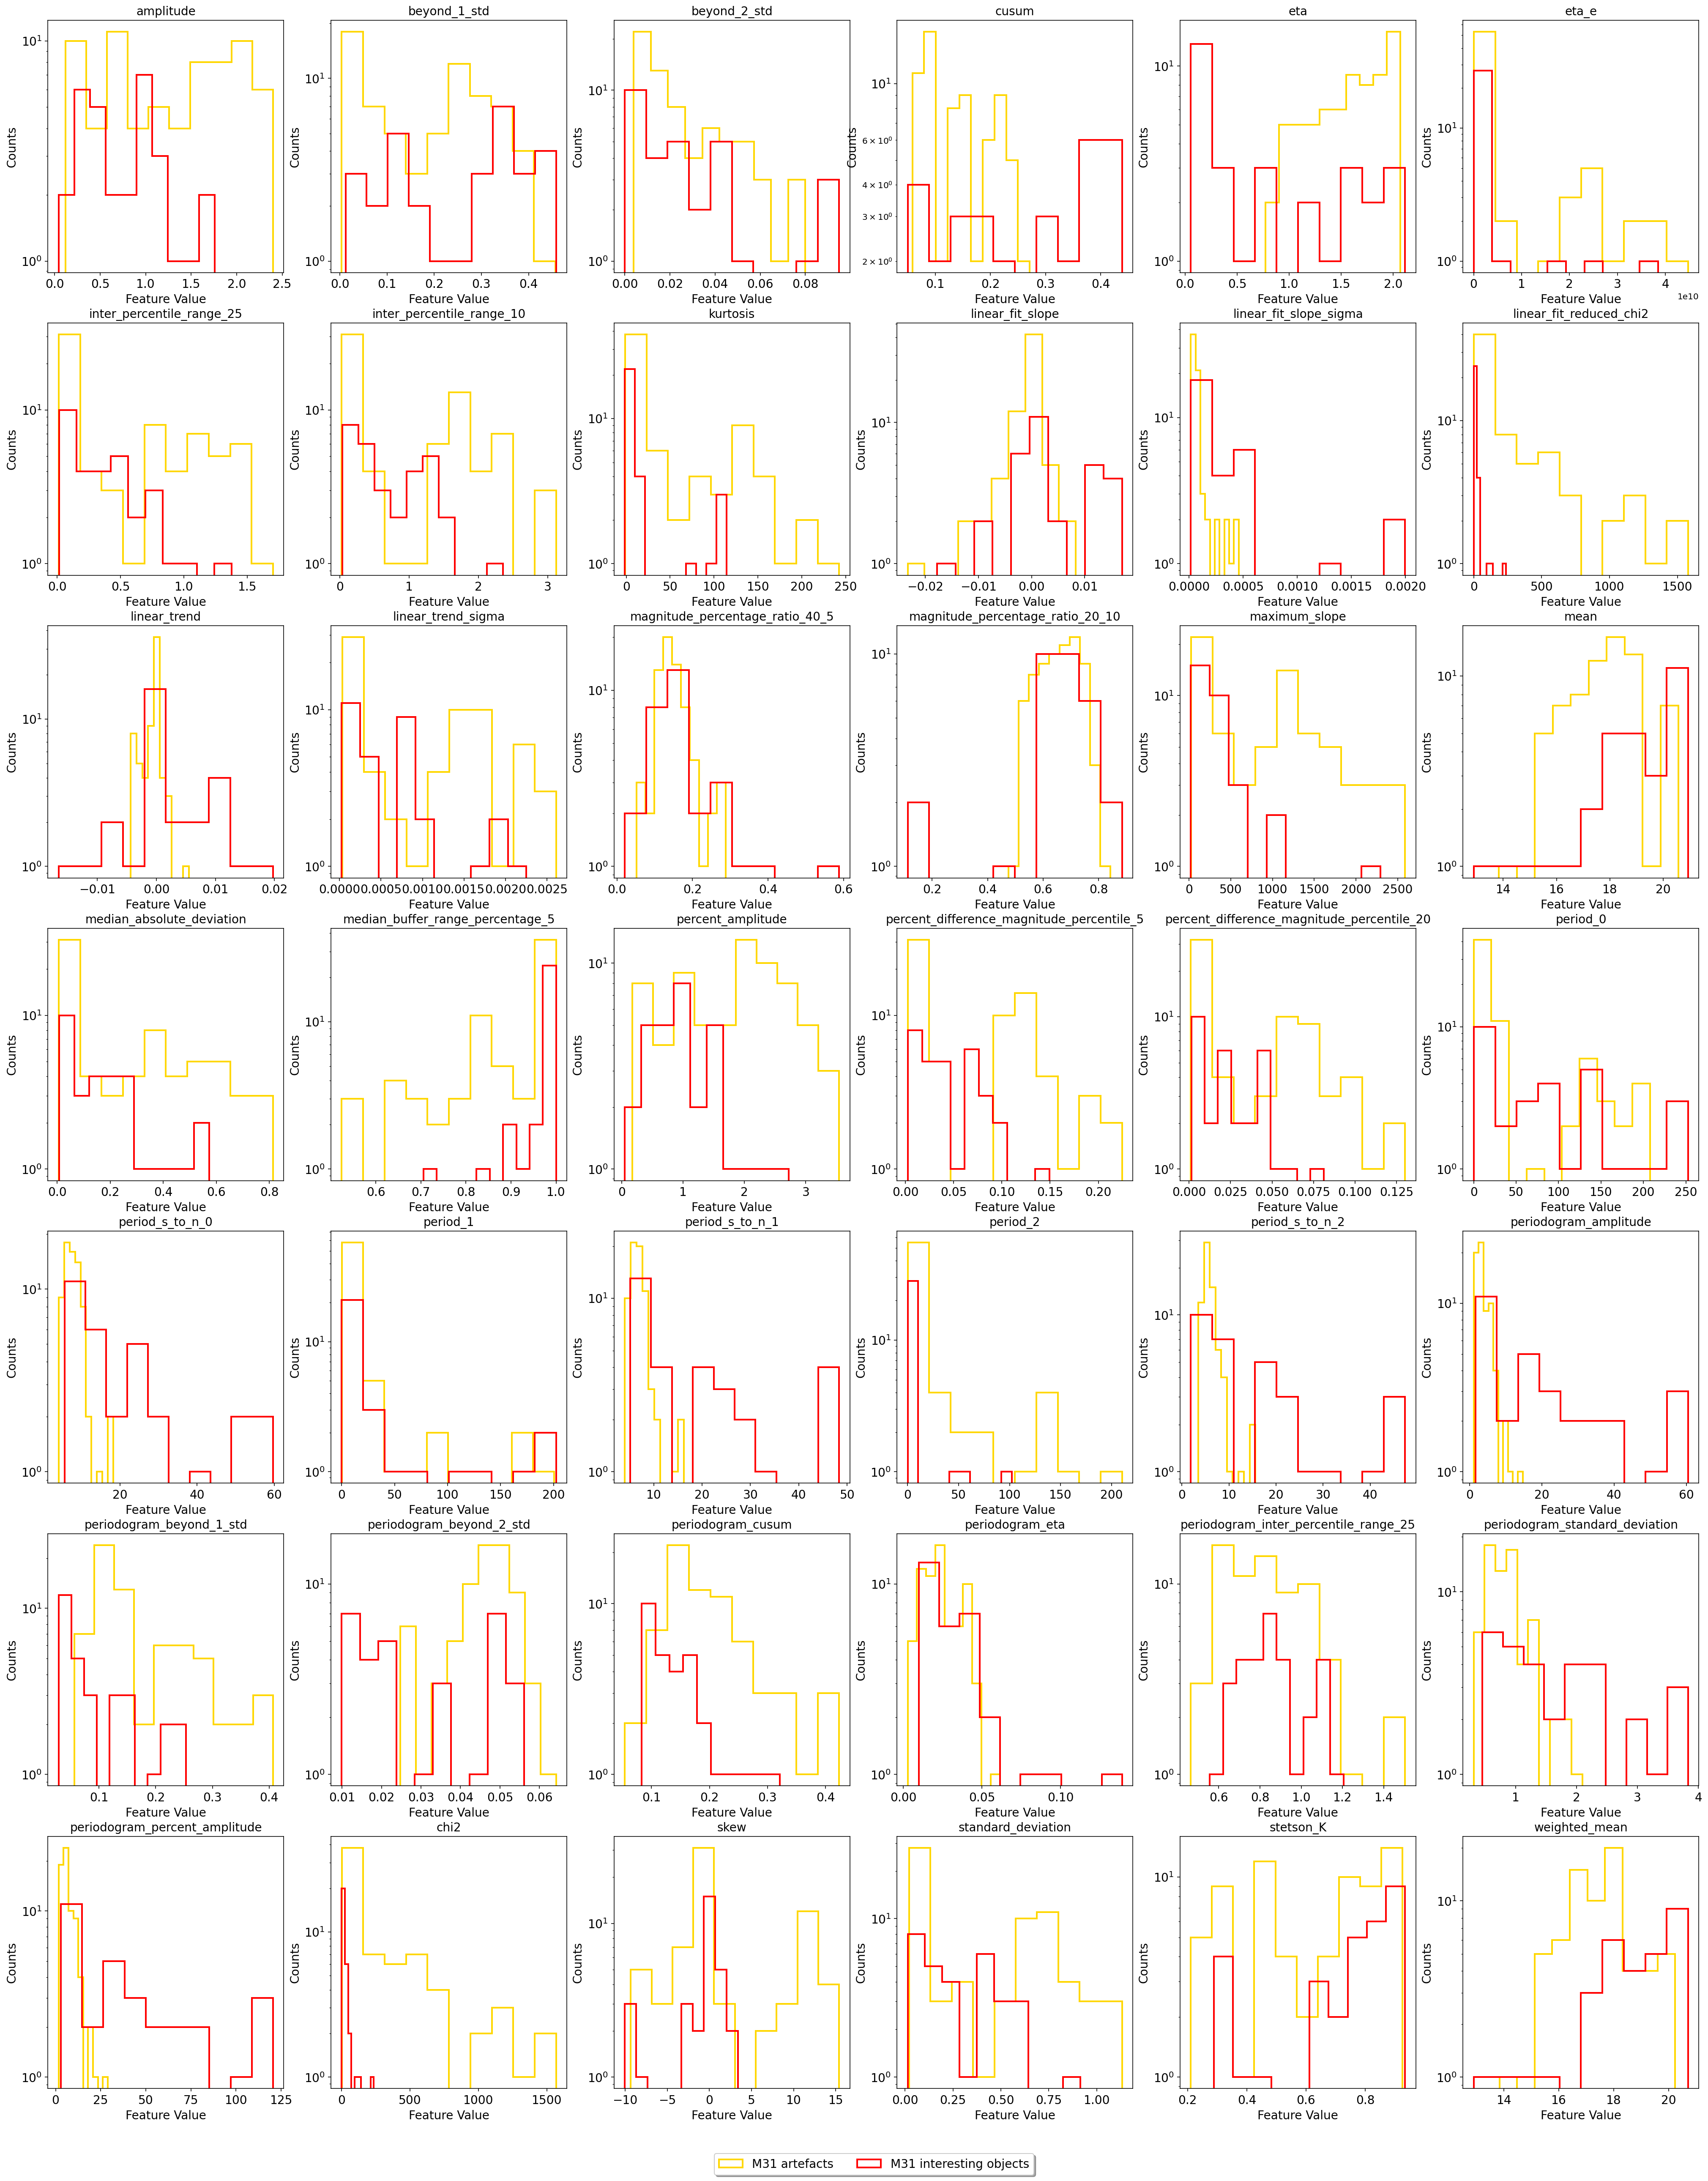

In [11]:
fig = plt.figure(figsize=(35, 45))

for i, f in enumerate(m31_names):
    ax = fig.add_subplot(7, 6, i+1) #42 features

    plt.hist(m31_artefacts['{}'.format(f)], histtype='step', color='gold', linewidth=2, label='M31 artefacts')
    plt.hist(m31_interesting['{}'.format(f)], histtype='step', color='red', 
             alpha=1, linewidth=2, label='M31 interesting objects')
    
    ax.set_title(r'{}'.format(f), fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel('Feature Value', fontsize=14)
    ax.set_yscale('log')
    ax.tick_params(labelsize=14)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(-3.2, -0.3), ncol=2, fancybox=True, shadow=True, fontsize=14)

fig.tight_layout()
fig.savefig('../figs/histograms/m31_artefacts_vs_interesting_objs.png', format='png', bbox_inches='tight', dpi=300)

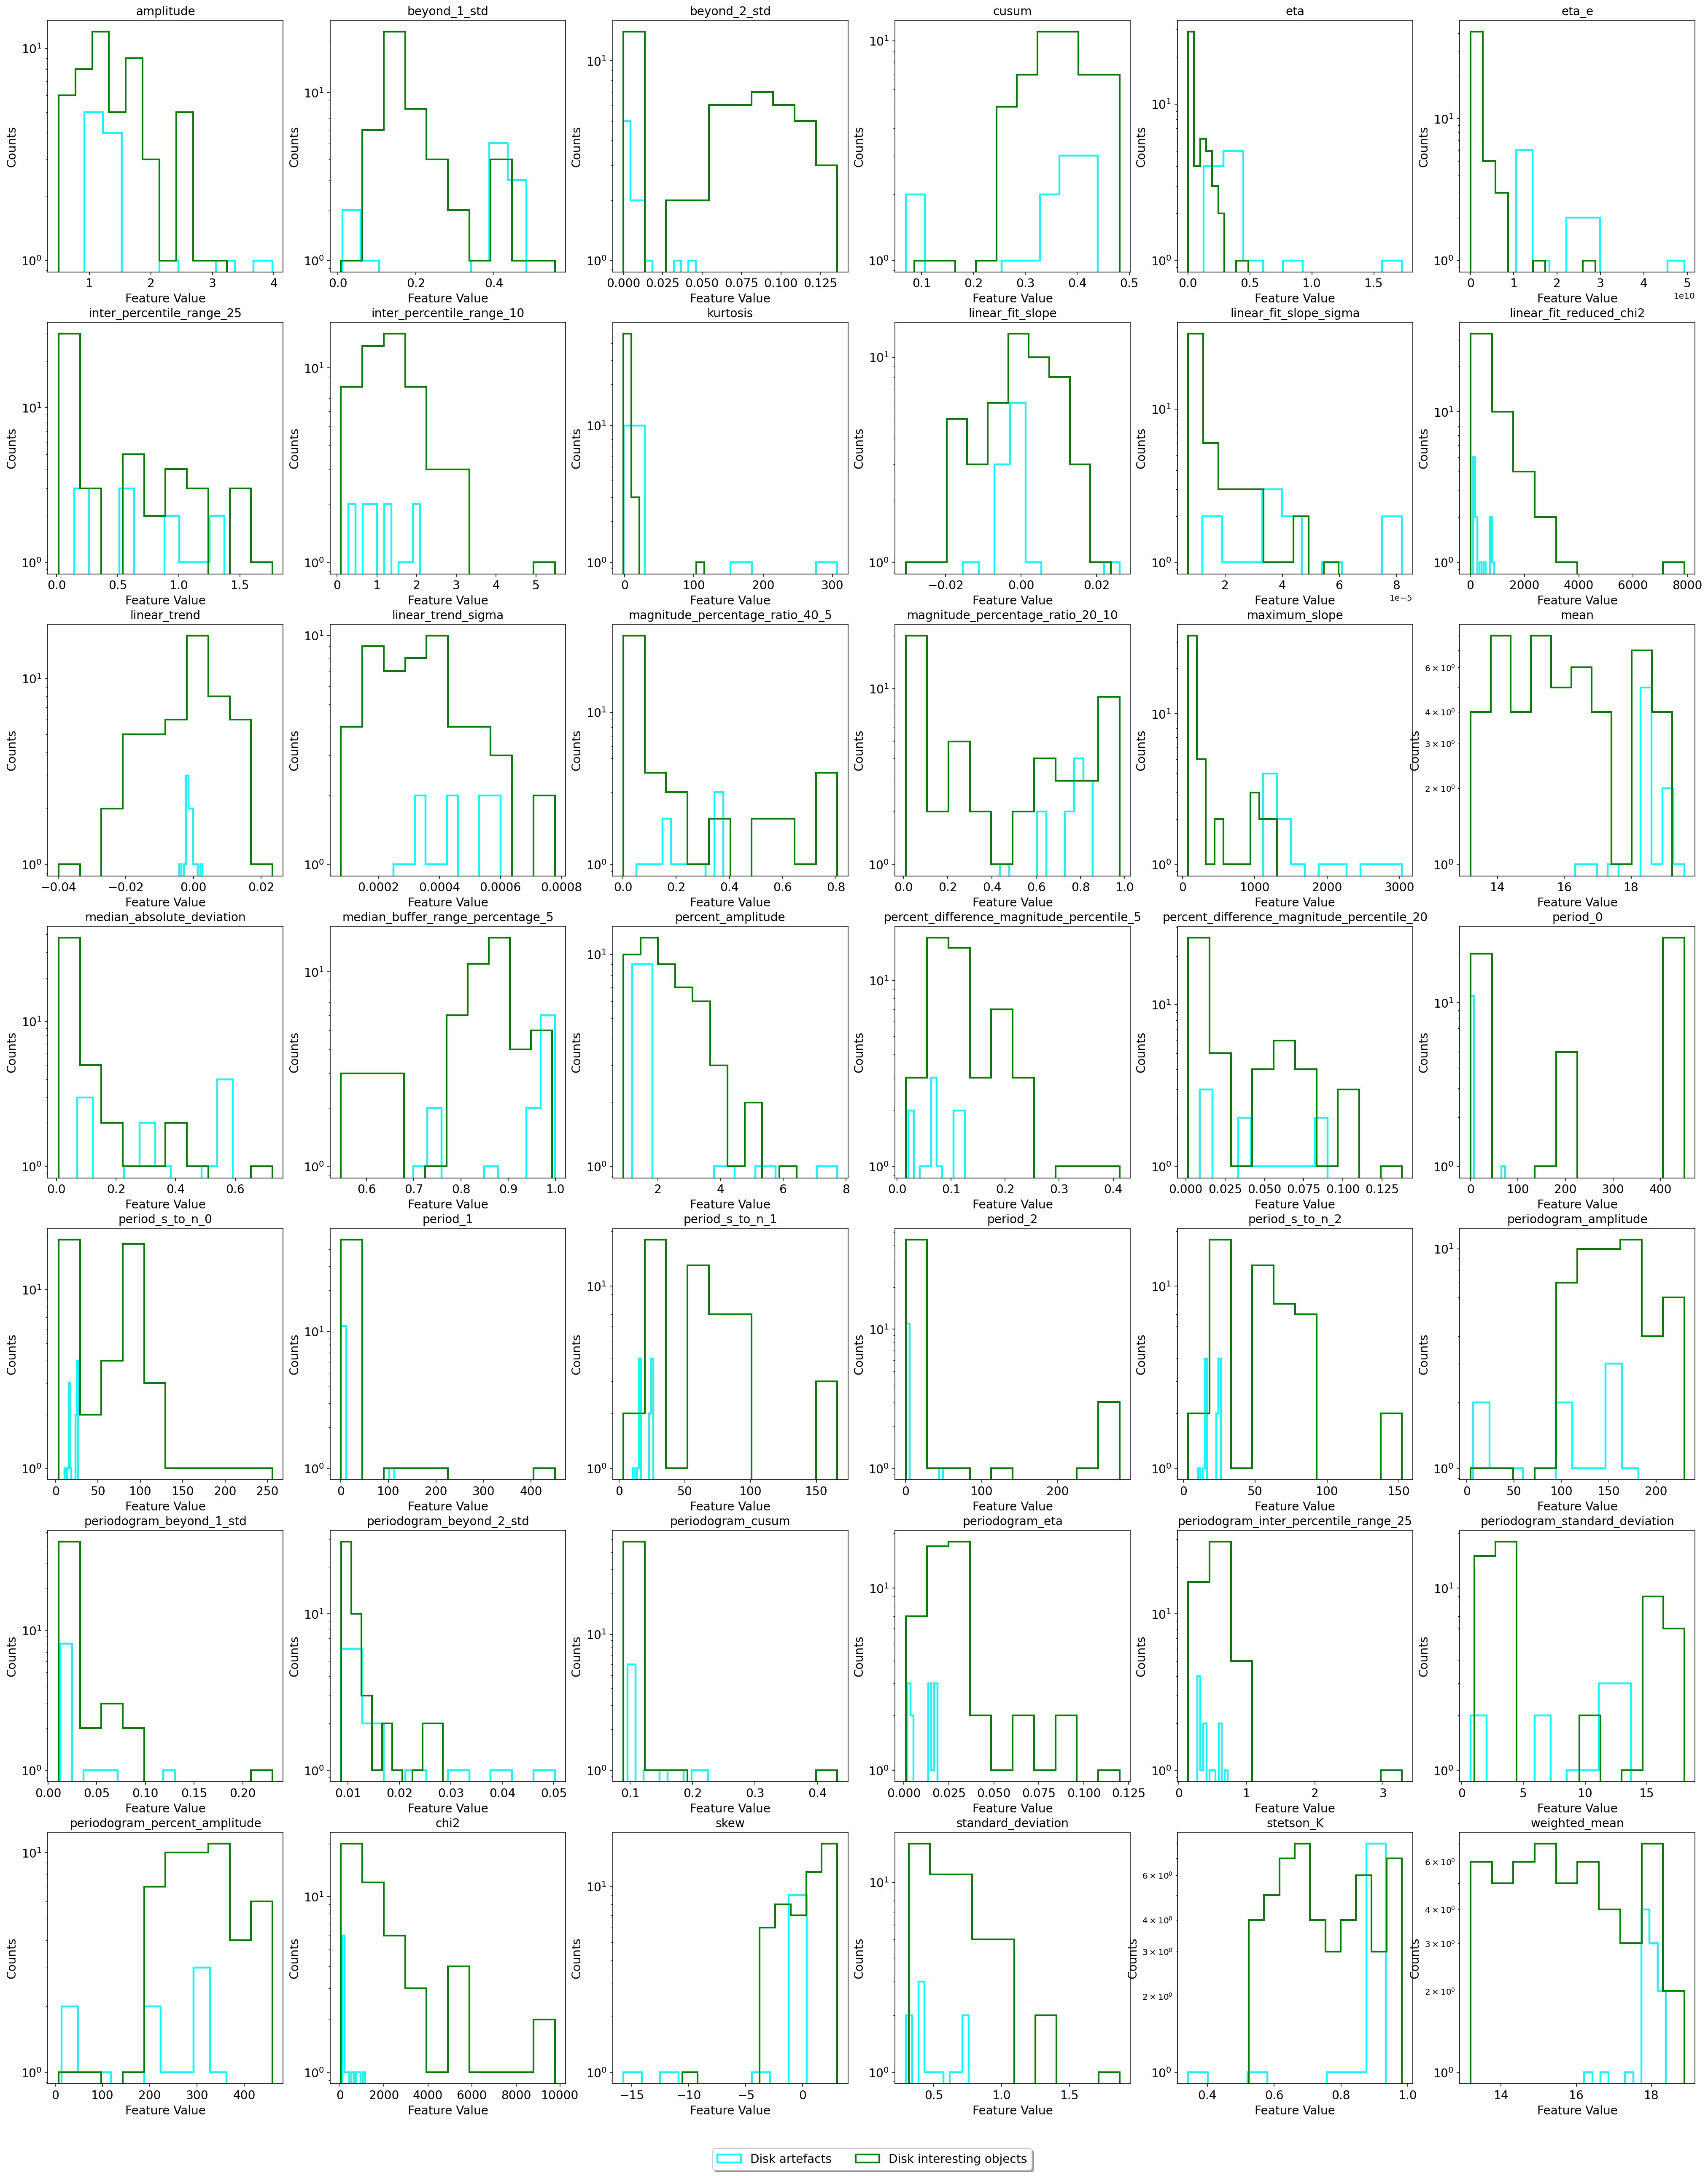

In [12]:
fig = plt.figure(figsize=(35, 45))

for i, f in enumerate(m31_names):
    ax = fig.add_subplot(7, 6, i+1) #42 features

    plt.hist(disk_artefacts['{}'.format(f)], histtype='step', color='cyan', linewidth=2, label='Disk artefacts')
    plt.hist(disk_interesting['{}'.format(f)], histtype='step', color='green', 
             alpha=1, linewidth=2, label='Disk interesting objects')
    
    ax.set_title(r'{}'.format(f), fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel('Feature Value', fontsize=14)
    ax.set_yscale('log')
    ax.tick_params(labelsize=14)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(-3.2, -0.3), ncol=2, fancybox=True, shadow=True, fontsize=14)

fig.tight_layout()
fig.savefig('../figs/histograms/disk_artefacts_vs_interesting_objs.png', format='png', bbox_inches='tight', dpi=300)

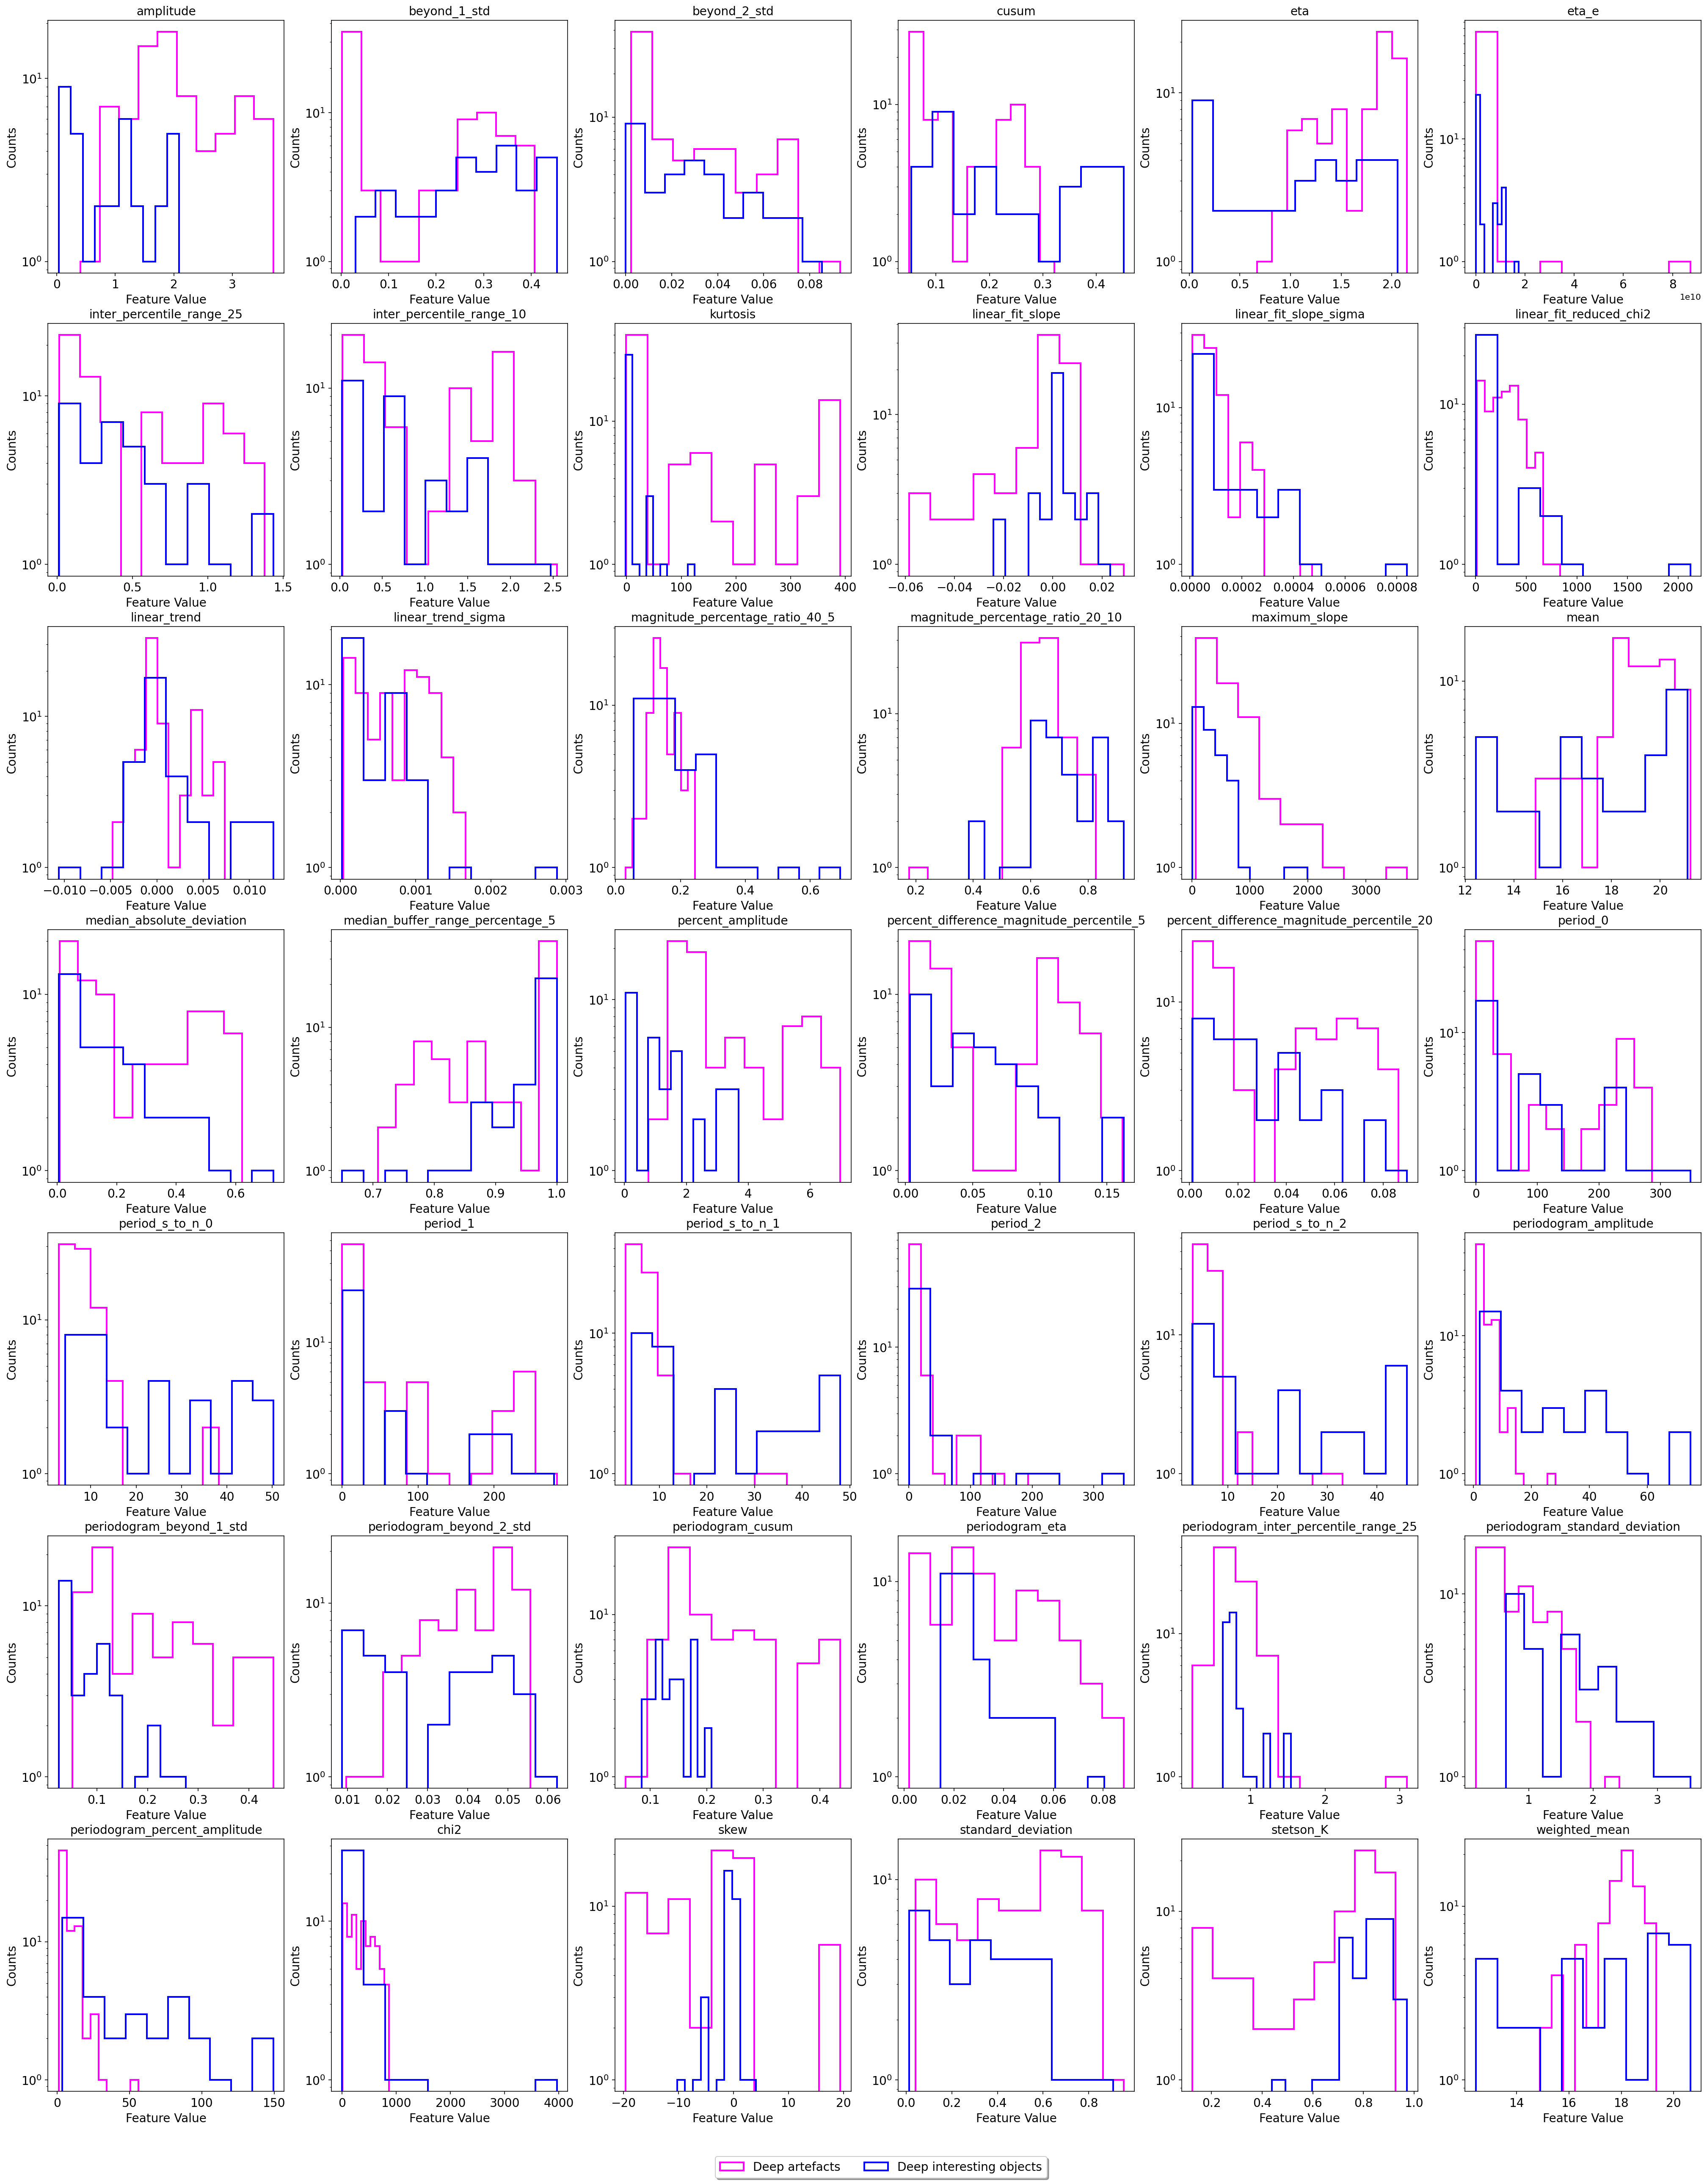

In [13]:
fig = plt.figure(figsize=(35, 45))

for i, f in enumerate(m31_names):
    ax = fig.add_subplot(7, 6, i+1) #42 features

    plt.hist(deep_artefacts['{}'.format(f)], histtype='step', color='magenta', linewidth=2, label='Deep artefacts')
    plt.hist(deep_interesting['{}'.format(f)], histtype='step', color='blue', 
             alpha=1, linewidth=2, label='Deep interesting objects')
    
    ax.set_title(r'{}'.format(f), fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    ax.set_xlabel('Feature Value', fontsize=14)
    ax.set_yscale('log')
    ax.tick_params(labelsize=14)
    #ax.legend(loc='best')
        
plt.legend(loc='center left', bbox_to_anchor=(-3.2, -0.3), ncol=2, fancybox=True, shadow=True, fontsize=14)

fig.tight_layout()
fig.savefig('../figs/histograms/deep_artefacts_vs_interesting_objs.png', format='png', bbox_inches='tight', dpi=300)